In [6]:
import rasterio as rio
import proplot as pplt
import pandas as pd
import numpy as np
from rasterio.plot import reshape_as_image

In [108]:
dataloc = '../../data/viirs_test_data/'
modis_images = dataloc + 'modis_resources/baffin_bay/truecolor/'
segmented_images = dataloc + '/segmented_images/'
dates = pd.date_range('2024-03-02', '2024-03-05', freq='1D')

In [109]:
tc_images = {}
s_images = {}
for date in dates:
    with rio.open(modis_images + date.strftime('%Y%m%d') + '.aqua.truecolor.250m.tiff') as im:
        tc_images[date.strftime('%Y%m%d')] = im.read()
    with rio.open(segmented_images + date.strftime('%Y%m%d') + '.aqua.truecolor.250m.tiff') as im:
        s_images[date.strftime('%Y%m%d')] = im.read()

/opt/miniconda3/envs/cal-val/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [100]:
import os
from skimage.measure import label, regionprops
os.listdir('../../data/viirs_test_data/modis_results/baffin_bay/')

['soit', '.DS_Store', 'landmasks', 'preprocess', 'tracker']

In [101]:
# edges function from cv2, maybe in scikit
#  edges = cv2.Canny(output.astype('uint8'), 50, 150)

In [104]:
bottom, top

(96, 104)

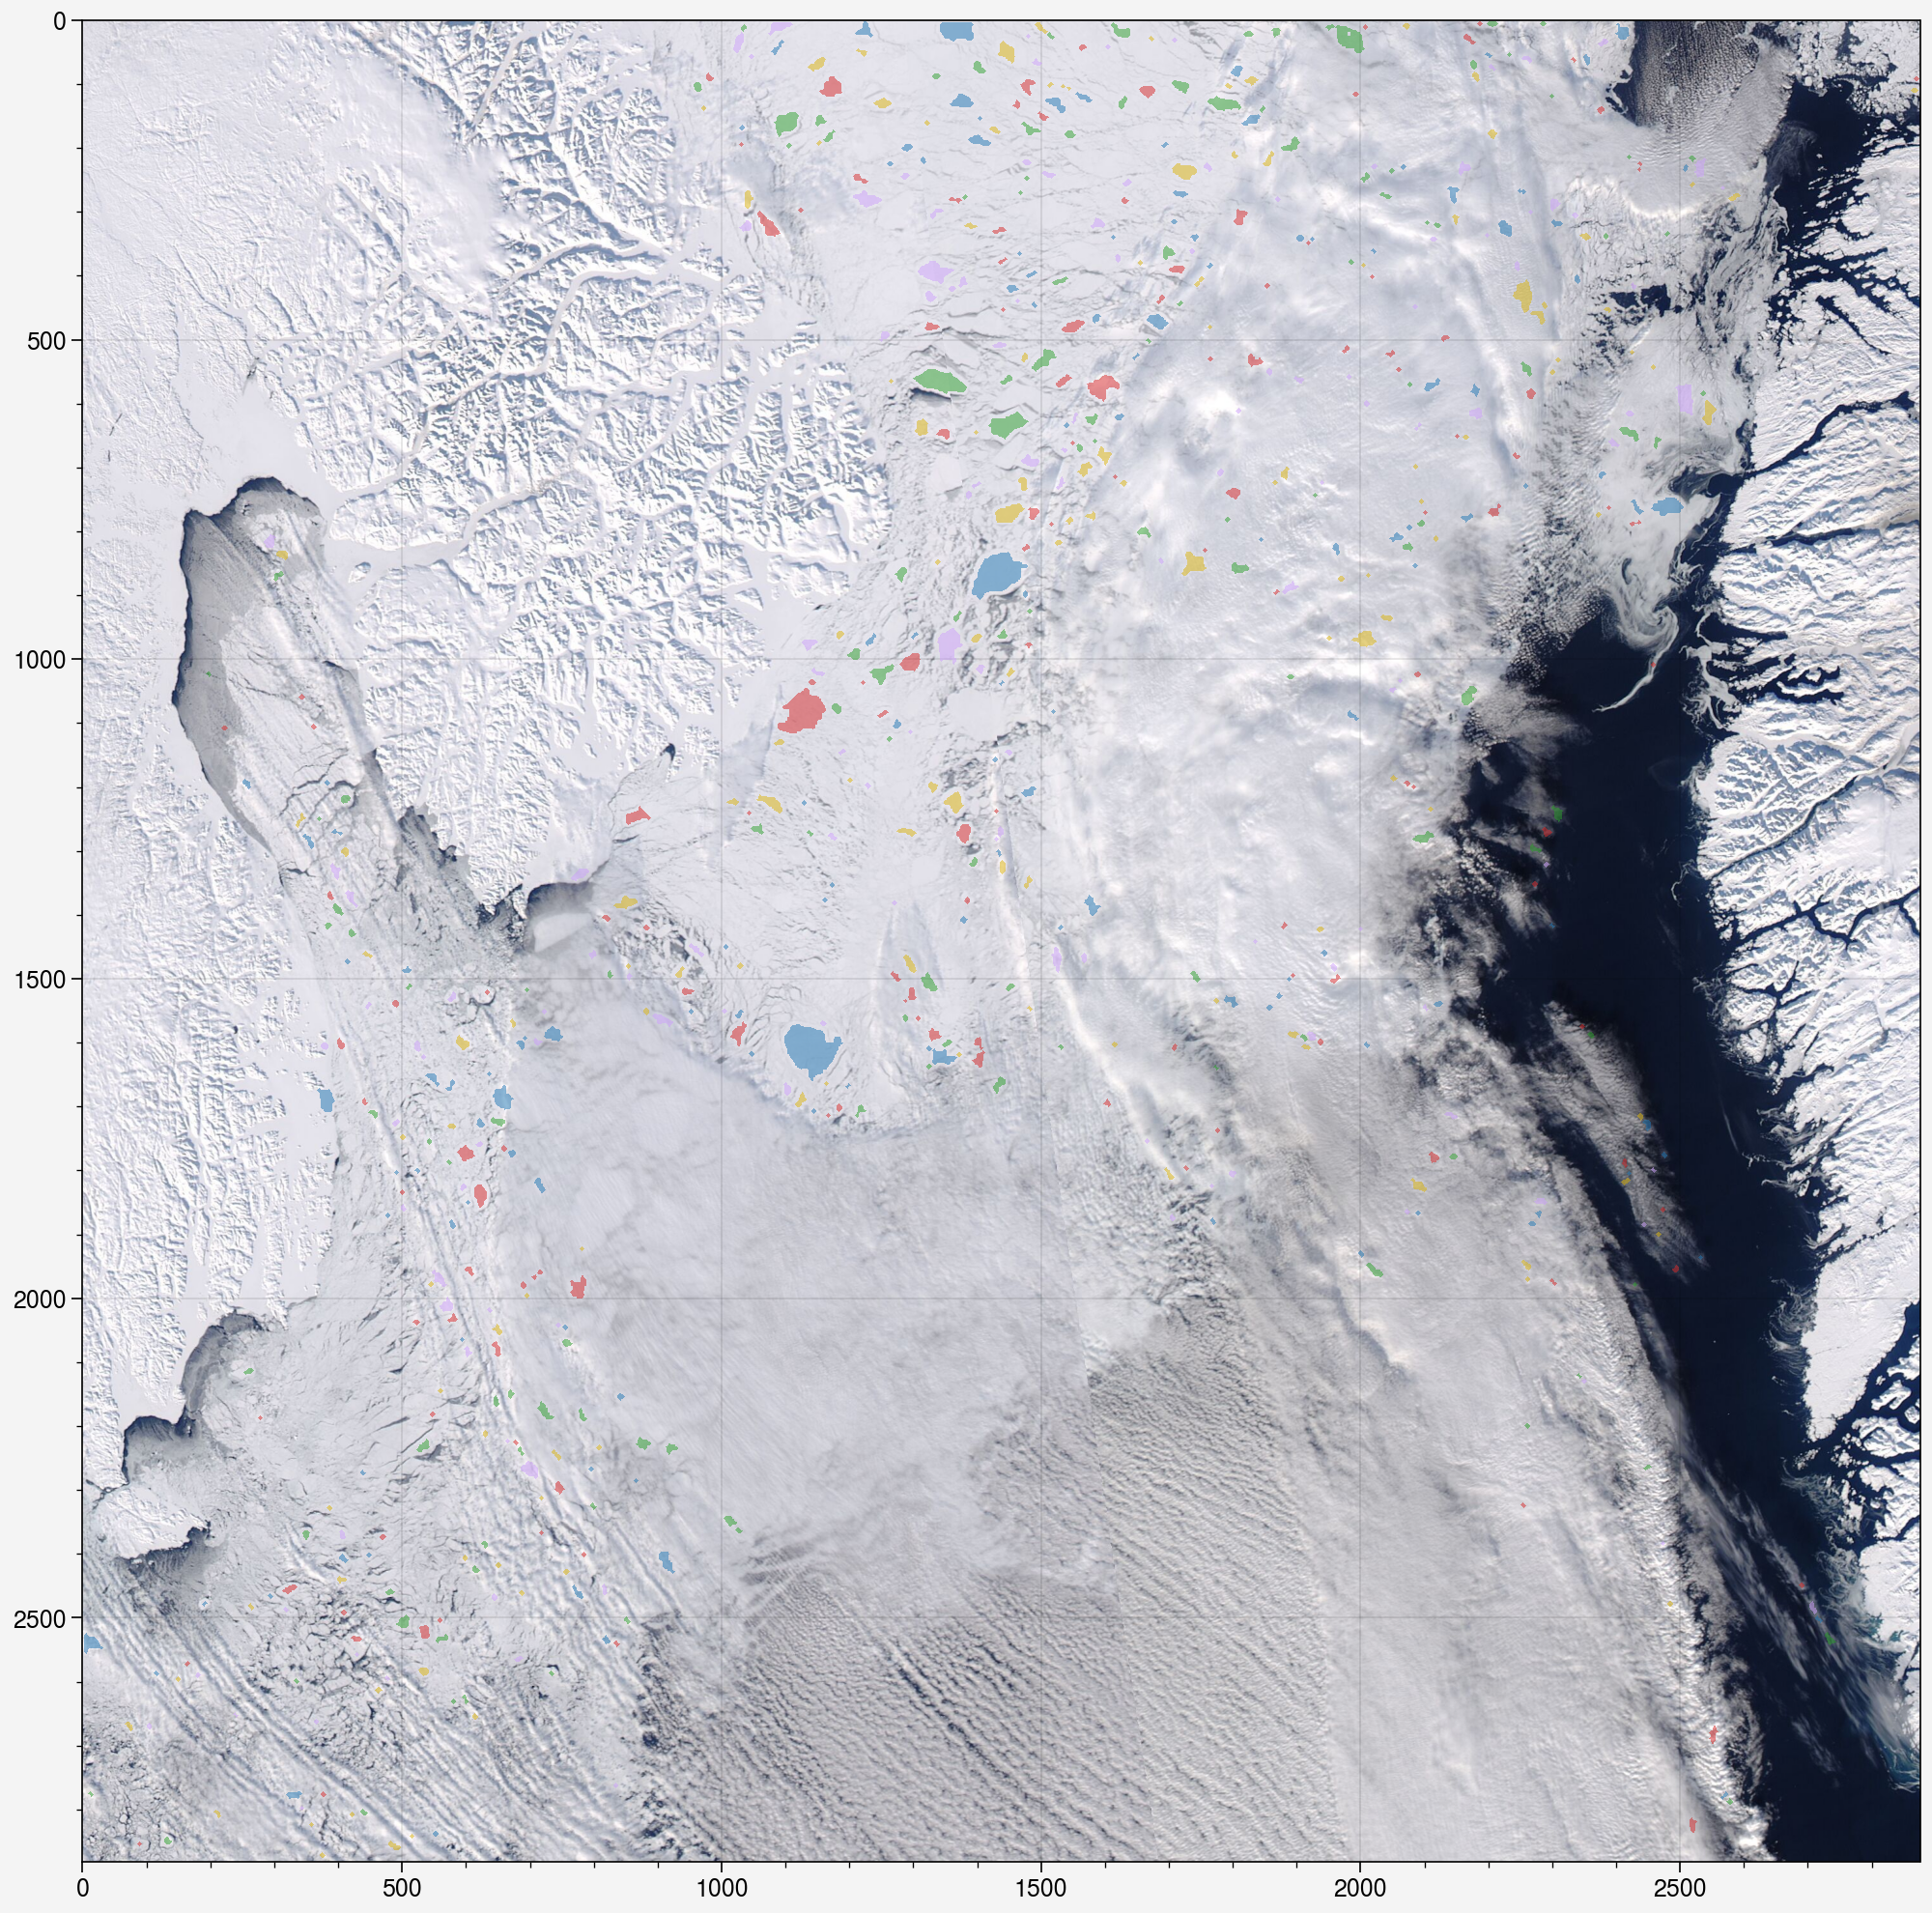

In [115]:
colors = ['tab:blue', 'tab:green', 'gold', 'tab:red', 'lilac']
fig, ax = pplt.subplots(width=10)

# im = label(reshape_as_image(s_images['20240305'])).squeeze()
# features = regionprops(im)
# idx = 0
# for x in features:
#     C = 4*np.pi * x.area/(x.perimeter**2)
#     if C > 0.6:
#         bottom, left, top, right = x.bbox
#         image = x.image.astype(int)
#         ax.imshow(np.ma.masked_array(image, image==0), extent=(left, right, top, bottom), zorder=2, c='gray', alpha=0.85)
#         idx += 1
im = label(reshape_as_image(s_images['20240304'])).squeeze()
features = regionprops(im)
idx = 0
for x in features:
    C = 4*np.pi * x.area/(x.perimeter**2)
    if C > 0.6:
        bottom, left, top, right = x.bbox
        image = x.image.astype(int)
        ax.imshow(np.ma.masked_array(image, image==0), extent=(left, right, top, bottom), zorder=2, c=colors[idx % 5], alpha=0.5)
        idx += 1

ax.imshow(reshape_as_image(tc_images['20240304']), zorder=1)

In [91]:
ax.imshow(x.image.astype(int), extent=(left, right, bottom, top), zorder=2)

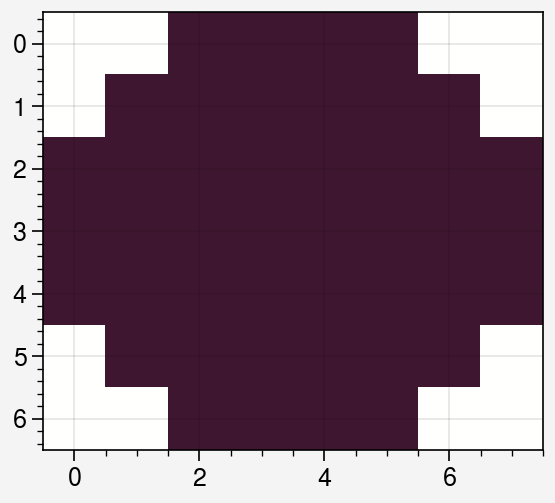

In [116]:
fig, ax = pplt.subplots()
ax.imshow(x.image.astype(int))

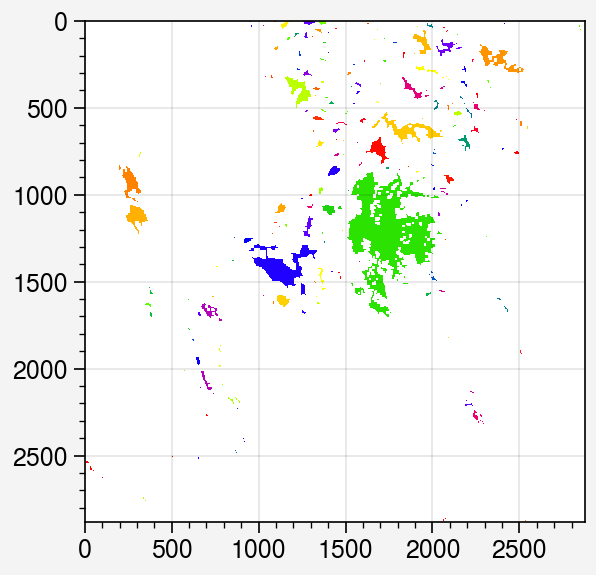

In [54]:
fig, ax = pplt.subplots()
ax.imshow(np.ma.masked_array(im, im==0), cmap='prism')